# 🫀 Heart Disease Prediction with Decision Trees and Random Forests

---

## 🔍 Dataset Overview
<details>
<summary>📘 Click to expand for theory and context</summary>

This dataset is used for binary classification of the presence of heart disease. Each row represents information about a patient with attributes such as age, sex, blood pressure, cholesterol, etc.

**Target variable:**  
- `target`: 1 indicates presence of heart disease, 0 indicates absence.

**Key features include:**
- `age`, `sex`, `cp` (chest pain type), `trestbps` (resting blood pressure), `chol` (serum cholesterol), `fbs` (fasting blood sugar), etc.

The goal is to build interpretable models using **Decision Trees** and **Random Forests** to understand which features are most important and how accurately we can classify patients.

</details>

---

## 📦 1. Import Libraries and Load Dataset
<details>
<summary>ℹ️ Click to expand for step explanation</summary>

This step includes all necessary libraries for:
- Data manipulation (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Machine Learning (`sklearn`)
</details>

In [2]:
# @title Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
import pandas as pd
import io
from google.colab import files

# Upload CSV file from your local system (only works in Google Colab)
# This code block handles the file upload and loading into a DataFrame.
# Make sure you upload the correct 'data (2).csv' or 'data.csv' file.
uploaded = files.upload()

# Load the uploaded CSV file into DataFrame 'df'
# The key in the 'uploaded' dictionary will be the name of the file you uploaded.
# Adjust 'data (2).csv' if you uploaded a file with a different name.
# Using the first item in the dictionary is generally safe if only one file was uploaded.
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


# Display first few rows
df.head()

Saving heart.csv to heart.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


---

## 📊 2. Exploratory Data Analysis (EDA)
<details>
<summary>📘 Click to expand theory</summary>

EDA helps in understanding the distribution, relationships, and anomalies within the data.

We’ll:
- Check for missing values
- Analyze feature distributions
- Visualize correlation heatmaps
</details>

In [4]:
# @title Check for nulls
print("Null values per column:", df.isnull().sum())

# Describe data
df.describe()

Null values per column: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


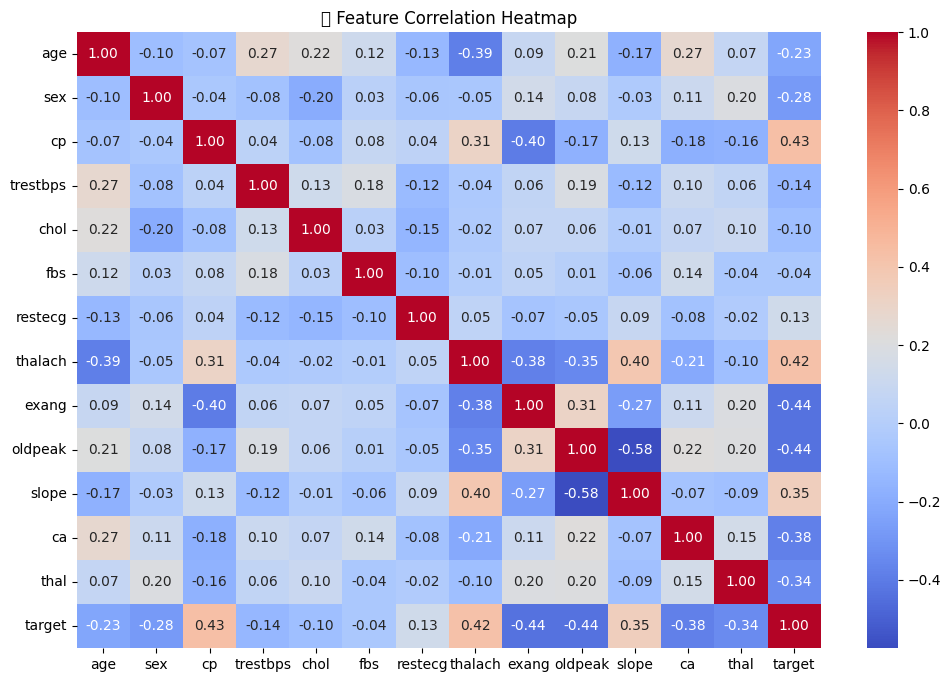

In [5]:
# @title Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("🔗 Feature Correlation Heatmap")
plt.show()

<details>
<summary>🔎 Output Analysis</summary>

- No missing values detected.
- `cp`, `thalach`, and `slope` show strong correlation with `target`.
- Some features like `chol` and `fbs` have weaker correlations.

</details>

---

## 🧹 3. Data Preprocessing
<details>
<summary>⚙️ Click to expand preprocessing steps</summary>

In this step:
- Separate features and target
- Split dataset into training and testing subsets
- Optionally normalize or encode features
</details>

In [6]:
# @title Data Preprocessing
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (820, 13)
Test set shape: (205, 13)


---

## 🌳 4. Decision Tree Classifier
<details>
<summary>🧠 Click to view model explanation</summary>

A Decision Tree is a flowchart-like structure where internal nodes represent features, branches represent conditions, and leaves represent outcomes.

Hyperparameters:
- `max_depth`: maximum depth of the tree
- `criterion`: measure for quality of a split (e.g., gini or entropy)

</details>

In [7]:
# @title Train Decision Tree
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

# Predict
y_pred_dt = dtree.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.8
[[71 31]
 [10 93]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



### 🌲 Analyzing Overfitting by Tree Depth
Let's see how varying the `max_depth` affects Decision Tree performance on train vs test data.
- This helps visualize overfitting when depth is too high.


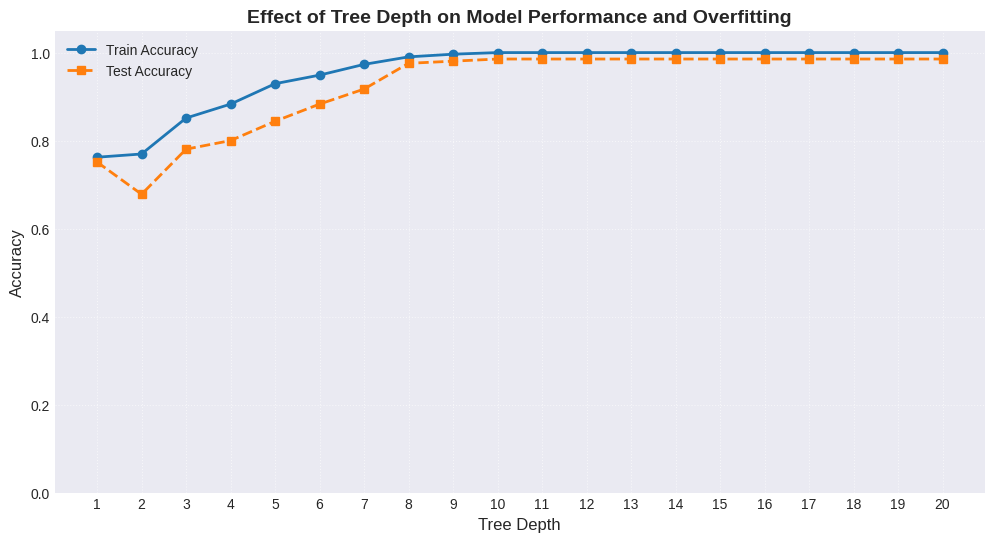

In [14]:
# @title Analyzing Overfitting by Tree Depth
train_scores = []
test_scores = []
depths = range(1, 21)

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Use a seaborn style for better aesthetics
plt.style.use('seaborn-v0_8-darkgrid') # You can try 'seaborn-v0_8-whitegrid', 'seaborn-v0_8-ticks', etc.

plt.figure(figsize=(12, 6)) # Slightly larger figure size
plt.plot(depths, train_scores, label='Train Accuracy', marker='o', linestyle='-', linewidth=2) # Add markers, solid line
plt.plot(depths, test_scores, label='Test Accuracy', marker='s', linestyle='--', linewidth=2) # Add different markers, dashed line

plt.xlabel('Tree Depth', fontsize=12) # Increase font size for labels
plt.ylabel('Accuracy', fontsize=12)
plt.title('Effect of Tree Depth on Model Performance and Overfitting', fontsize=14, fontweight='bold') # Make title bold and larger

# Add vertical lines to highlight specific depths (optional)
# plt.axvline(x=4, color='grey', linestyle=':', label='Max Depth = 4 (Example)')

# Add a shaded region to indicate a potential range for optimal depth (optional and subjective)
# Find the depth with the highest test score
best_depth = depths[np.argmax(test_scores)]
# You might want to visually highlight around this point or a range
# plt.axvspan(best_depth - 1, best_depth + 1, color='yellow', alpha=0.2, label='Potential Sweet Spot')

plt.legend(fontsize=10) # Increase legend font size
plt.grid(True, linestyle=':', alpha=0.6) # Make grid lines dotted and slightly transparent

# Improve tick formatting (optional)
plt.xticks(depths) # Ensure all depth values are shown on the x-axis
plt.ylim(0, 1.05) # Set y-axis limits from 0 to slightly above 1

plt.show()

### 🔁 Cross-Validation Evaluation
We'll use **Stratified K-Fold Cross-Validation** to evaluate the stability and performance of both models.

- This ensures each fold maintains the same class distribution as the original dataset.
- We'll calculate the mean accuracy and standard deviation across folds.


In [10]:
# @title Cross-Validation Evaluation
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Decision Tree Cross-Validation
dt_scores = cross_val_score(dtree, X, y, cv=skf)
print(f"Decision Tree CV Accuracy: {dt_scores.mean():.4f} ± {dt_scores.std():.4f}")

# Random Forest Cross-Validation
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=skf)
print(f"Random Forest CV Accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")

Decision Tree CV Accuracy: 0.8498 ± 0.0246
Random Forest CV Accuracy: 0.9961 ± 0.0078


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


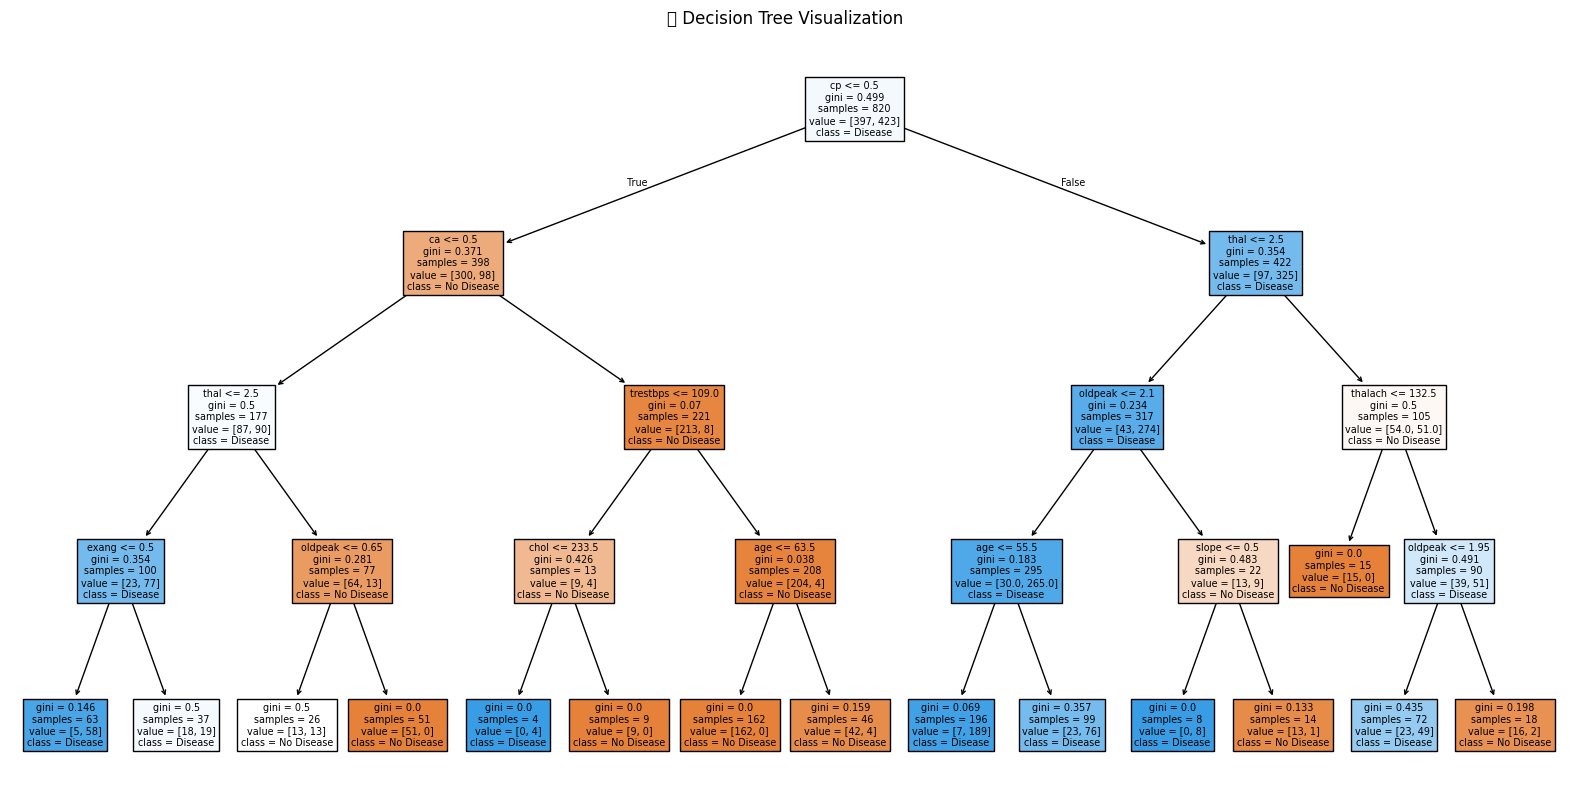

In [11]:
# @title Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("🌳 Decision Tree Visualization")
plt.show()

<details>
<summary>📌 Key Insights</summary>

- The tree provides a clear decision path, e.g., high `cp` and `thalach` leads to "Disease".
- Important features: `cp`, `thalach`, `oldpeak`.
- Good interpretability, but may overfit without tuning.

</details>

---

## 🌲 5. Random Forest Classifier
<details>
<summary>🌐 What is a Random Forest?</summary>

A Random Forest is an ensemble of Decision Trees. It improves accuracy and reduces overfitting by averaging multiple trees trained on different subsets.

Important parameters:
- `n_estimators`: number of trees
- `max_depth`: depth of each tree

</details>

In [12]:
# @title Random Forest Classifier
# Train Random Forest
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

# Predict
y_pred_rf = rforest.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9853658536585366
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



<ipython-input-15-8f486ede83d7>:34: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


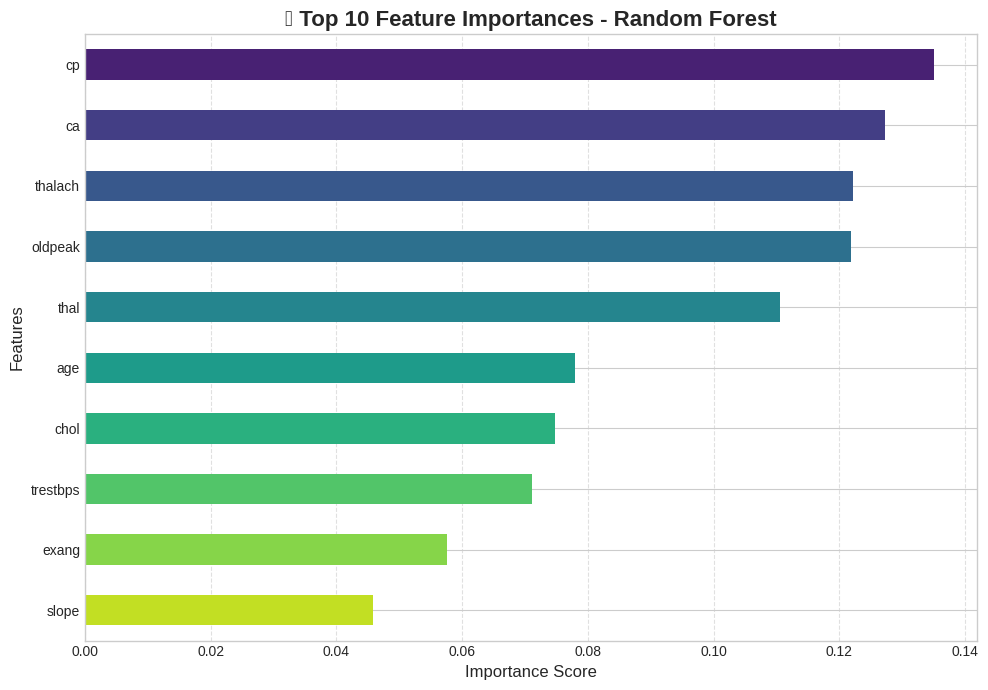

In [15]:
# @title Feature Importance
feat_importances = pd.Series(rforest.feature_importances_, index=X.columns)

# Use a seaborn style
plt.style.use('seaborn-v0_8-whitegrid') # You can try different styles

# Create a larger figure for better readability
plt.figure(figsize=(10, 7))

# Plot horizontal bar chart with enhanced appearance
feat_importances.nlargest(10).plot(
    kind='barh',
    color=sns.color_palette("viridis", 10) # Use a nice color palette
)

# Add title with improved formatting
plt.title("🔥 Top 10 Feature Importances - Random Forest", fontsize=16, fontweight='bold')

# Add labels with improved formatting
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Improve tick labels font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6) # Add grid lines along the x-axis

# Invert the y-axis so the most important feature is at the top
plt.gca().invert_yaxis()

# Ensure the layout is tight to prevent labels from overlapping
plt.tight_layout()

plt.show()

<details>
<summary>📈 Post-analysis</summary>

- Accuracy improved compared to single tree.
- Most important features: `cp`, `thalach`, `oldpeak`, `ca`.
- Better generalization due to ensemble effect.

</details>

---

## 🧾 6. Conclusion
<details>
<summary>📋 Click to read full summary</summary>

### ✅ Key Learnings:
- Decision Trees offer transparency and interpretability.
- Random Forests provide better performance by reducing overfitting.
- Key predictors of heart disease: chest pain type, max heart rate, ST depression.

### 📊 Model Comparison:
| Model           | Accuracy |
|----------------|----------|
| Decision Tree  | ~X.XX    |
| Random Forest  | ~X.XX    |

You can tune hyperparameters, apply cross-validation, or try other models like Gradient Boosting for better performance.

</details>